In [1]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 32.7 MB/s eta 0:00:00


In [2]:
pip install soltrannet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.2 MB/s eta 0:00:00


In [3]:
import soltrannet as stn

In [4]:
#testing a simple prediction
my_smiles=["c1ccccc1","c1ccccc1 .ignore","Cn1cnc2n(C)c(=O)n(C)c(=O)c12","[Zn+2]","[Na+].[Cl-]"]
predictions=list(stn.predict(my_smiles))

/usr/local/lib/python3.10/dist-packages/soltrannet/data_utils.py:207: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  return [torch.FloatTensor(adjacency_list), torch.FloatTensor(features_list), smiles_list, index_list]


In [5]:
predictions

[(-1.052748441696167, 'c1ccccc1', ''),
 (-1.052748441696167, 'c1ccccc1 .ignore', ''),
 (-1.1322435140609741, 'Cn1cnc2n(C)c(=O)n(C)c(=O)c12', ''),
 (-6.881844520568848,
  '[Zn+2]',
  'Other-typed Atom(s) Detected Prediction less reliable'),
 (-0.16869044303894043,
  '[Na+].[Cl-]',
  'Salt Other-typed Atom(s) Detected Prediction less reliable')]

In [6]:
import sys

In [7]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [8]:
## Mount google drive
from google.colab import drive

In [9]:
drive.mount("/content/drive")

Mounted at /content/drive


In [10]:
# specifying my input folder
input_folder = "/content/drive/MyDrive/Ersilia"

In [11]:
# specifying my output folder
output_folder = "/content/drive/MyDrive/Ersilia"

In [12]:
input_filename = "llinas2020_raw"

In [13]:
#specifying my smiles column
smiles_column = "smiles"

In [14]:
import pandas as pd

In [15]:
# checking smiles
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")

My dataset contains 132 SMILES


In [16]:
df

,COMPOUND,SET,log S0,smiles
0,Acetazolamide,SET1,-2.38,CC(NC1=NN=C(S1)[S](N)(=O)=O)=O
1,Acetylsalicylic Acid,SET1,-1.67,C(C)(=O)OC1=CC=CC=C1C(=O)O
2,Alclofenac,SET1,-4.40,C=CCOc1ccc(cc1Cl)CC(=O)O
3,Ambroxol,SET1,-3.87,O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2
4,Aripiprazole,SET1,-6.64,O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...
...,...,...,...,...
127,Sulfadimethoxine,SET2,-3.74,C1=C(N=C(N=C1N[S](C2=CC=C(N)C=C2)(=O)=O)OC)OC
128,Tamoxifen,SET2,-7.52,C1=CC(=CC=C1\C(=C(C2=CC=CC=C2)\CC)C3=CC=CC=C3)...
129,Telmisartan,SET2,-6.73,CCCc1nc2c(cc(cc2n1Cc3ccc(cc3)c4ccccc4C(=O)O)c5...
130,Terfenadine,SET2,-7.74,C1=CC=CC=C1C(C3CCN(CCCC(C2=CC=C(C(C)(C)C)C=C2)...


In [17]:
# Extract smiles from the DataFrame and make predictions
my_smiles = df["smiles"].tolist()
predictions = list(stn.predict(my_smiles))
predictions

/usr/local/lib/python3.10/dist-packages/soltrannet/data_utils.py:207: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  return [torch.FloatTensor(adjacency_list), torch.FloatTensor(features_list), smiles_list, index_list]


[(-1.2419066429138184, 'CC(NC1=NN=C(S1)[S](N)(=O)=O)=O', ''),
 (-1.857985258102417, 'C(C)(=O)OC1=CC=CC=C1C(=O)O', ''),
 (-3.119774103164673, 'C=CCOc1ccc(cc1Cl)CC(=O)O', ''),
 (-2.1994705200195312, 'O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2', ''),
 (-5.205143928527832,
  'O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c2)CC1',
  ''),
 (-6.521167755126953, 'O=C1c2ccccc2C(=O)C(O)=C1C1CCC(CC1)c1ccc([Cl])cc1', ''),
 (-2.817272663116455, 'CCNc1nc(nc(n1)Cl)NC(C)C', ''),
 (-1.7760666608810425, 'C1=CC(=CC=C1C(CC(O)=O)CN)Cl', ''),
 (-1.8396010398864746, 'CCC(C)C1(C(=O)NC(=O)NC1=O)CC', ''),
 (-4.210572719573975,
  'C1=C(Cl)C(=CC2=C1NC(=N[S]2(=O)=O)CSCC3=CC=CC=C3)[S](N)(=O)=O',
  ''),
 (-4.71967077255249, 'O=C1Nc2c(C(c3ncccc3)=NC1)cc(Br)cc2', ''),
 (-7.789660453796387,
  'CCOC1=NC2=CC=CC(=C2N1CC3=CC=C(C=C3)C4=CC=CC=C4C5=NNN=N5)C(=O)OC(C)OC(=O)OC6CCCCC6',
  ''),
 (-3.8526968955993652, 'C1=CC=CC3=C1N(C2=C(C=CC=C2)C=C3)C(N)=O', ''),
 (-3.251559257507324, 'C1=CC=CC2=C1[NH]C3=CC=CC=C23', ''),
 (-2.4678301

In [18]:
predictions_df = pd.DataFrame(predictions, columns=["pred", "smiles", "true_values"])

predictions_df.to_csv("/content/drive/MyDrive/Ersilia/SoltranetPredictions.csv", index=False)
predictions_df

,pred,smiles,true_values
0,-1.241907,CC(NC1=NN=C(S1)[S](N)(=O)=O)=O,
1,-1.857985,C(C)(=O)OC1=CC=CC=C1C(=O)O,
2,-3.119774,C=CCOc1ccc(cc1Cl)CC(=O)O,
3,-2.199471,O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2,
4,-5.205144,O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...,
...,...,...,...
127,-3.680895,C1=C(N=C(N=C1N[S](C2=CC=C(N)C=C2)(=O)=O)OC)OC,
128,-5.474015,C1=CC(=CC=C1\C(=C(C2=CC=CC=C2)\CC)C3=CC=CC=C3)...,
129,-7.919227,CCCc1nc2c(cc(cc2n1Cc3ccc(cc3)c4ccccc4C(=O)O)c5...,
130,-4.835241,C1=CC=CC=C1C(C3CCN(CCCC(C2=CC=C(C(C)(C)C)C=C2)...,


In [19]:
#matching outputs with drug names and returning the true solubility values
# Merging dataframes
merged_predictions = pd.merge(predictions_df, df[['smiles', 'log S0']], how='left', left_on='smiles', right_on='smiles')

# Renaming and dropping redundant columns
#merged_predictions = merged_predictions.rename(columns={'log S0': 'true'}).drop(columns='smiles')
merged_predictions = merged_predictions.rename(columns={'log S0': 'true'})
merged_predictions = merged_predictions.drop(columns='true_values', axis=1)

# Displaying the result
print(merged_predictions)

         pred                                             smiles  true
0   -1.241907                     CC(NC1=NN=C(S1)[S](N)(=O)=O)=O -2.38
1   -1.857985                         C(C)(=O)OC1=CC=CC=C1C(=O)O -1.67
2   -3.119774                           C=CCOc1ccc(cc1Cl)CC(=O)O -4.40
3   -2.199471           O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2 -3.87
4   -5.205144  O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c... -6.64
..        ...                                                ...   ...
127 -3.680895      C1=C(N=C(N=C1N[S](C2=CC=C(N)C=C2)(=O)=O)OC)OC -3.74
128 -5.474015  C1=CC(=CC=C1\C(=C(C2=CC=CC=C2)\CC)C3=CC=CC=C3)... -7.52
129 -7.919227  CCCc1nc2c(cc(cc2n1Cc3ccc(cc3)c4ccccc4C(=O)O)c5... -6.73
130 -4.835241  C1=CC=CC=C1C(C3CCN(CCCC(C2=CC=C(C(C)(C)C)C=C2)... -7.74
131 -3.475417                  C3=CC1=C([NH]C(=N1)C2=CSC=N2)C=C3 -3.97

[132 rows x 3 columns]


In [20]:
merged_predictions.to_csv("/content/drive/MyDrive/Ersilia/merged_predictions.csv", index=False)

Recreating results generated with SC2 datasets

In [23]:
def calc_stats(pred_array, true_array, insol_thresh=-6, sol_thresh=-4):
    '''
    This function will calculate the following on the predicted array:
        Hit% = #correct(lower_sol_thresh,upper_sol_thresh) / #(lower_sol_thresh,upper_sol_thresh)
        Fail% = #true(insol_thresh)pred(lower_sol_thresh,upper_sol_thresh) / #pred(lower_sol_thresh,upper_sol_thresh)

    Assumptions: pred_array,true_array are paired numpy arrays.
    '''

    #first we need to access the examples which have true in (lower_sol_thresh, upper_sol_thresh)
    true_mask=(true_array > sol_thresh)

    #calculating the Hit%
    num_true=len(true_array[true_mask])
    poss_hits=pred_array[true_mask]
    num_hits=np.sum((poss_hits>sol_thresh))
    hit=num_hits/float(num_true)

    #calculating the Fail%
    pred_mask=(pred_array > sol_thresh)
    insol_mask=true_array <= insol_thresh
    fail=np.sum(insol_mask & pred_mask) / float(np.sum(pred_mask))

    return hit,fail,np.sum(true_mask),np.sum(pred_mask)

In [24]:
import numpy as np
import pandas as pd
data={}

#adding the SolTranNet data
truths=np.array([])
preds=np.array([])
for s in ['set1','set2']:
    tmp=pd.read_csv('/content/drive/MyDrive/Ersilia/merged_predictions.csv')
    t=tmp['true']
    truths=np.append(truths,t)
    p=tmp['pred']
    preds=np.append(preds,p)

for ins in [-4,-5,-6]:
    data[ins]={'hit':[],'fail':[]}
    hit,fail,nt,npred=calc_stats(preds,truths,ins,-4)
    data[ins]['hit']=[('SolTranNet',hit)]
    data[ins]['fail']=[('SolTranNet',fail)]

In [25]:
np.mean(truths)

-4.321439393939395

19


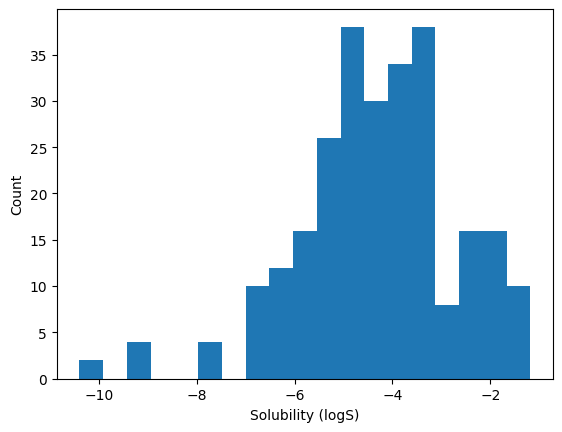

In [26]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
w=0.5
n=math.ceil((max(truths)-min(truths))/w)
print(n)
plt.hist(truths,bins=n)
plt.xlabel('Solubility (logS)')
plt.ylabel('Count')
plt.savefig('/content/drive/MyDrive/Ersilia/Reproducibility_plot.png')

In [28]:
import glob
all_files=glob.glob('/content/drive/MyDrive/Ersilia/SensitivityDatasets/*.csv')
keys=set([x.split('/')[-1].split('_set')[0] for x in all_files])
for ins in [-4,-5,-6]:
    for k in keys:
        truths=np.array([])
        preds=np.array([])
        todo=glob.glob(f'/content/drive/MyDrive/Ersilia/SensitivityDatasets/{k}*.csv')
        for fname in todo:
            tmp=pd.read_csv(fname)
            t=tmp['TRUE']
            truths=np.append(truths,t)
            p=tmp['PREDICTED']
            preds=np.append(preds,p)
        hit,fail,nt,npred=calc_stats(preds,truths,ins,-4)
        if np.isnan(hit):
            print(f'{k} hit is nan')
        else:
            data[ins]['hit'].append((k,hit))

        if np.isnan(fail):
            print(f'{k} fail is nan')
        else:
            data[ins]['fail'].append((k,fail))

In [29]:

data

{-4: {'hit': [('SolTranNet', 0.9310344827586207),
   ('hpsu_b', 0.5517241379310345),
   ('umut_a', 0.8793103448275862),
   ('mlkc_c', 0.8793103448275862),
   ('jhtny', 0.896551724137931),
   ('mlkc_a', 0.8620689655172413),
   ('jhunc_b', 1.0),
   ('yumpu_b', 0.7758620689655172),
   ('jmsa_a', 0.9655172413793104),
   ('jmsa_c', 0.9655172413793104),
   ('jmsa_b', 0.8793103448275862),
   ('jcsu_b', 0.9482758620689655),
   ('jcsu_a', 0.8793103448275862),
   ('yumpu_a', 0.7931034482758621),
   ('pmsa_a', 0.7586206896551724),
   ('umut_c', 0.896551724137931),
   ('pmsa_b', 0.7413793103448276),
   ('sgurv', 0.7931034482758621),
   ('rfsp_a', 0.9137931034482759),
   ('jhunc_c', 0.9827586206896551),
   ('umut_b', 0.8793103448275862),
   ('hpsu_a', 0.5517241379310345),
   ('xwuc_a', 0.896551724137931),
   ('jhunc_a', 0.9482758620689655),
   ('rfsp_b', 0.9482758620689655),
   ('tdipg', 0.8620689655172413),
   ('pmsa_c', 0.7758620689655172),
   ('mcsmd', 0.896551724137931),
   ('ytacu', 0.75862068

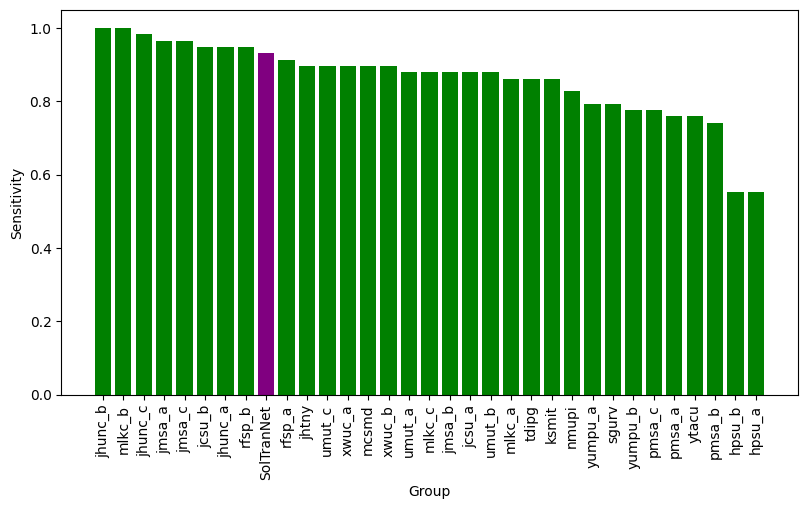

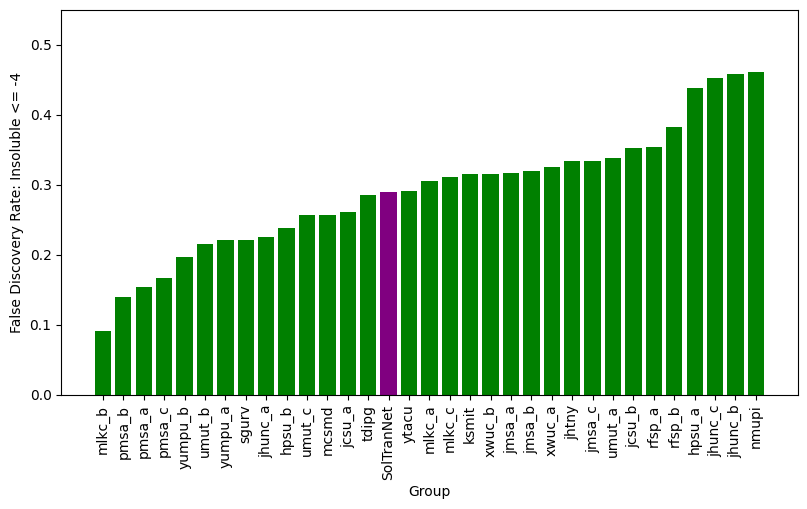

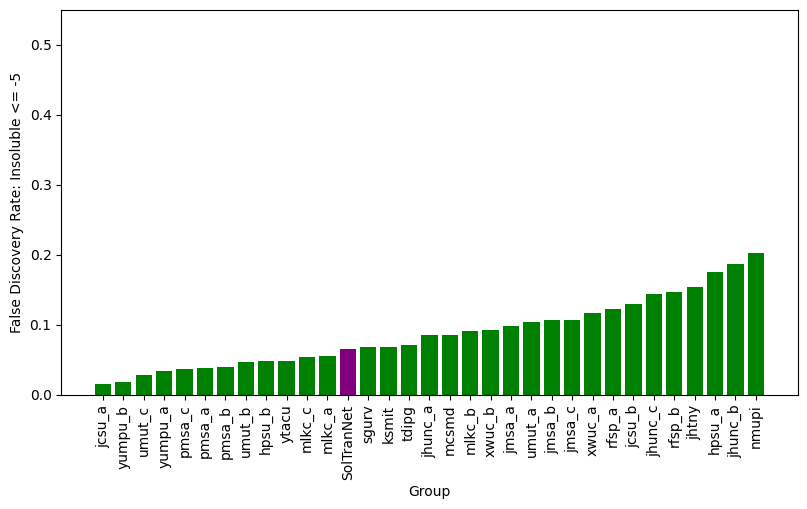

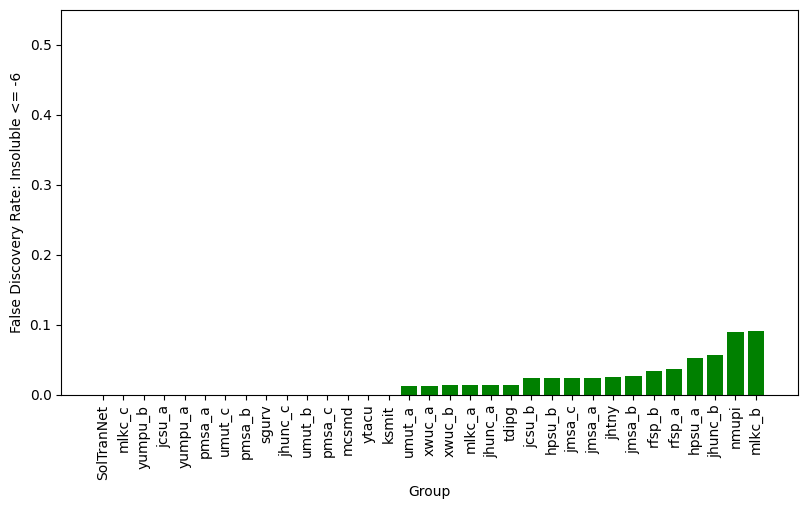

In [31]:
plotted_sens=False
for ins in data:
    for k in data[ins]:
        if k=='hit':
            if plotted_sens:
                continue
            fig=plt.figure(figsize=(9.5,5))
            all_data=sorted(data[ins][k],key=lambda x:x[1],reverse=True)
            plt.ylabel('Sensitivity')
        else:
            fig=plt.figure(figsize=(9.5,5))
            all_data=sorted(data[ins][k],key=lambda x:x[1])
            plt.ylabel(f'False Discovery Rate: Insoluble <= {ins}')
            plt.ylim((0,0.55))

        labels=[x[0] for x in all_data]
        ys=[x[1] for x in all_data]
        x_pos=[i for i,_ in enumerate(all_data)]
        colors=['purple' if x[0]=='SolTranNet' else 'green' for x in all_data]
        plt.bar(x_pos,ys,color=colors)
        plt.xlabel('Group')
        plt.xticks(x_pos,labels,rotation='vertical')
        filename = f'/content/drive/MyDrive/Ersilia/SensitivityPlot_{ins}.png'
        plt.savefig(filename)
        plotted_sens=True